In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import numpy as np
import matplotlib.pyplot as plt 
import skimage
import rasterio
from sklearn.metrics import accuracy_score

In [8]:
#!pip install scikit-image

In [9]:
#feature image path
feature_img_path = "E:/Grss_data/Track1/train/images/10.tif"
# Load the feature tif image with multibands
with rasterio.open(feature_img_path) as src:
    feature_img = src.read()
#check if the image is loaded
if feature_img is None:
    print("Error: Image not found")
else:
    print('Feature image size: {}'.format(feature_img.shape))

#load the label image
label_img_path = "E:/Grss_data/Track1/train/labels/10.png"
#load the label image
with rasterio.open(label_img_path) as src:
    label_img = src.read()
#check if the image is loaded
if label_img is None:
    print("Error: Image not found")
else:
    print('Feature image size: {}'.format(label_img.shape))


Feature image size: (6, 512, 512)
Feature image size: (1, 512, 512)


c:\Users\zwtf3\Anaconda3\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


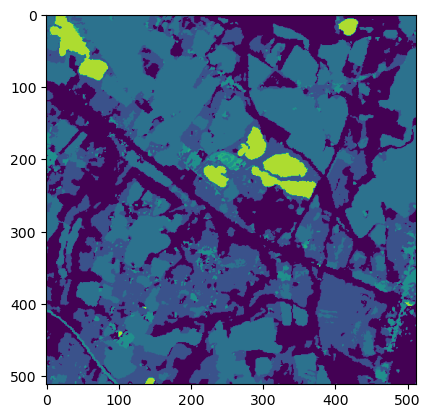

In [10]:
#display the image
plt.imshow(feature_img[4])

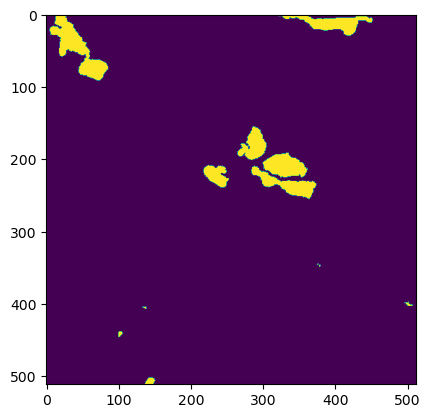

In [11]:
#display the label image
plt.imshow(label_img[0])

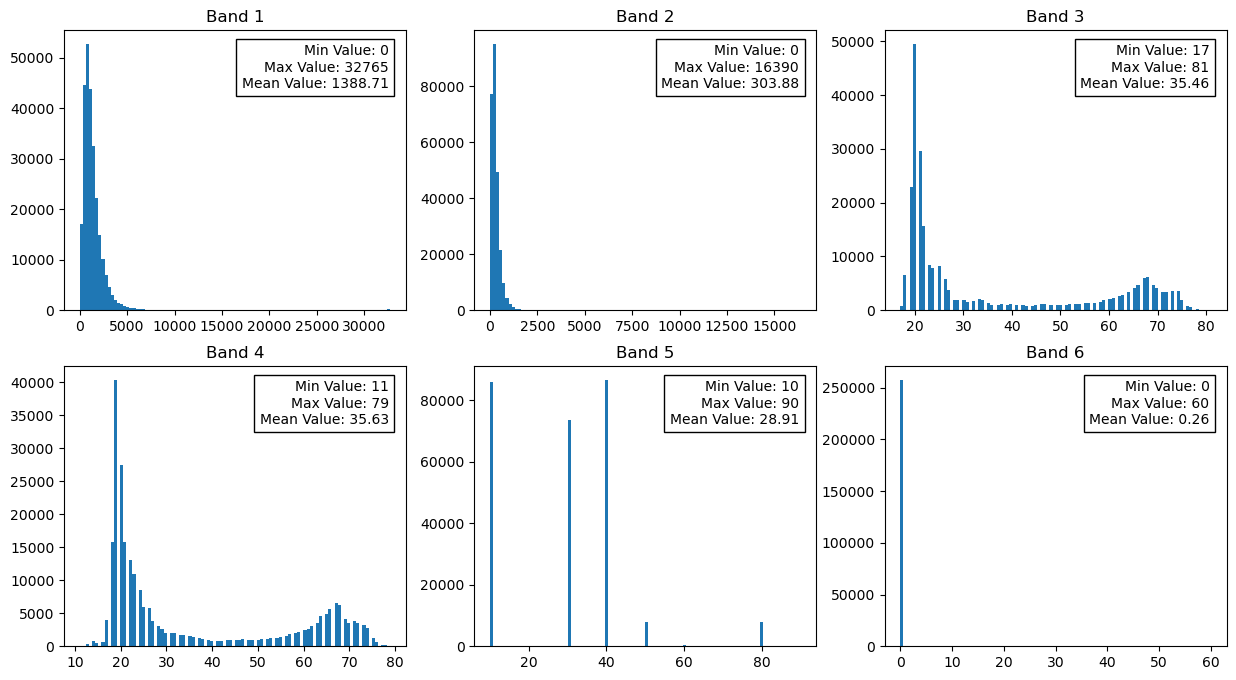

In [12]:
#plot the distribution of the features image.
plt.figure(figsize=(15,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(feature_img[i].ravel(), bins=100)
    plt.title("Band {}".format(i+1))
    plt.text(0.95, 0.95, "Min Value: {}".format(np.min(feature_img[i]))+'\n'+"Max Value: {}".format(np.max(feature_img[i]))+'\n'+"Mean Value: {}".format(round(np.mean(feature_img[i]),2)), ha='right', va='top', transform=plt.gca().transAxes,bbox=dict(facecolor = 'none',edgecolor = 'black'))

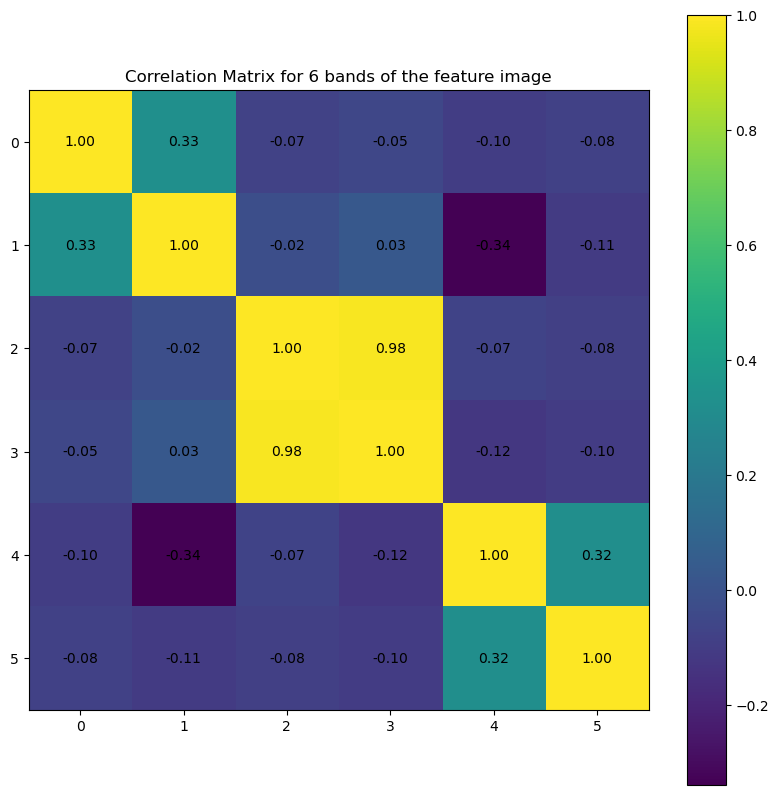

In [13]:
# Calculate the correlation matrix
corr_matrix = np.corrcoef(feature_img.reshape(6, -1), rowvar=True)

# Set up the figure
plt.figure(figsize=(10, 10))

# Display the correlation matrix
cax = plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar(cax)

# Add title
plt.title("Correlation Matrix for 6 bands of the feature image")

# Adding the correlation values as text annotations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix[i, j]:.2f}', ha='center', va='center', color='black')

# Show the plot
plt.show()

In [14]:
#re-orgnize the feature image, so that the image can be used for training
feature_img = np.moveaxis(feature_img, 0, -1)
feature_img = feature_img.reshape(-1, 6)
label_img = label_img.reshape(-1)

In [15]:
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(feature_img, label_img, test_size=0.2, random_state=42)
#check the shape of the training and testing data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(209715, 6) (209715,)
(52429, 6) (52429,)


In [16]:
#use the random forest classifier to train the model
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [17]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [21]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [2,3,4, 5, 6, 7, 8],
#     'criterion': ['gini', 'entropy']
# }

In [22]:
# # Create a GridSearchCV object
# CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# # Fit the model
# CV_clf.fit(X_train, y_train)

In [23]:
# # Print the best parameters and the best score
# print("Best Parameters:", CV_clf.best_params_)
# print("Best Score:", CV_clf.best_score_)